
# LGT1 Unit07 Day28 - Pre-class Assignment: Introduction to Deep Learning
### <p style="text-align: right;"> &#9989; Put your name here.</p>

---
## Goals of this assignment

The primary goals of this assignment are

* Learn how to construct a one-neuron neural network
* Study background on convolutional neural networks

The exercises in this notebook are taken from the AI training session provided by the Argonne Leadership Computing Facility.

## Assignment instructions

Please complete assignment before 1PM Dec. 3rd.
---

# Part 1: One-Neuron Neural Network
The following assignment uses the materials from the AI training session provided by the Argonne Leadership Computing Facility.
You can watch the video and do the exercises below.

For the pre-class assignment, you are **not** expected to watch the whole 2-hour tutorial.
You should stop at the 45-minute mark (you start around 9 minutes into this video).

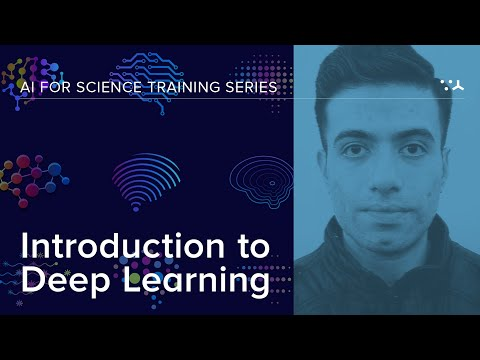

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("jM1NhlIsWro",width=640,height=340,start=540,stop=2700)
# https://www.youtube.com/watch?v=jM1NhlIsWro&t=540s

Historically, mathematical neurons were motivated by analogy to biological neurons.
The picture below illustrates the analogy: on the left-hand side is a biological neuron with a bunch of dendrites, which take incoming signals.
The input signals come in as electrical pulses with certain frequency, and if the frequency of the incoming signal reaches a certain threshold, then there is an outgoing signal which goes out and communicates with other neurons.

So structurally, if we draw a mathematical neuron, it looks kind of similar to a biological neuron.
A bunch of inputs come into the circle representing the neuron, then some kind of computation goes on inside that.
Then, we apply some kind of threshold to that computation such that if the values above the threshold, then there will be an output, otherwise there will be no output.
Now, the question is, what kind of computation goes on inside the cell body and is it also motivated by biological neurons?

Each input comes in, and you multiply each by a weight and add a bias; you apply the threshold function (some nonlinear function) to the sum over the inputs, and that gives you your output.

We're going to model a straight-line linear regression (fitting to $y = mx+b$) as a one-neuron network.
First, let's generate some noisy data that we'll try to fit.

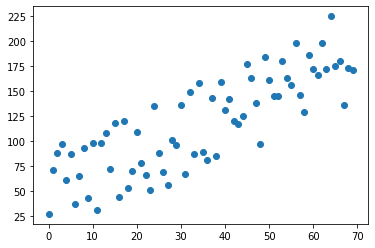

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0,70, 1)
Y = 2*X
noise = 100*np.random.rand(70)
Y = Y + noise

plt.scatter(X, Y)
plt.show()

The parameters of our network are $m$ and $b$ which we initialize randomly; the prediction is given by

$$ \tilde{y_i} = mx_i + b $$

For the _loss function_ we use the standard mean squared error:

$$ L = \frac{1}{N} \sum_{k=1}^N \left(y_k - \tilde{y_k}\right)^2 $$

Our _batch gradient descent_ step uses the entire dataset as the batch:

$$\begin{align}
m &= m - \alpha \frac{dL}{dm} \\
b &= b - \alpha \frac{dL}{db}
\end{align}$$

where $\alpha$ is the _learning rate_, and the gradients are given by:

$$\begin{align}
\frac{dL}{dm} &= -\frac{2}{N} \sum_{k=1}^N x_k(y_k - \tilde{y_k})\\
\frac{dL}{db} &= -\frac{2}{N} \sum_{k=1}^N (y_k - \tilde{y_k})
\end{align}$$

Random guess for m and b: (array([0.47792695]), array([2.17620634]))


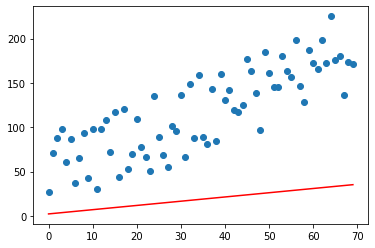

In [ ]:
# Initial random guess of m and b
m = np.random.randn(1)
b = np.random.randn(1)
print(f'Random guess for m and b:',(m,b))

# Initial random prediction
Y_pred = m*X + b

plt.scatter(X, Y)
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

Obviously the initial prediction doesn't fit the data well.
You can improve the results by following the formulation above.

### 1.1: Task
Comment the following code to understand how the neural network works.

In [ ]:
### Fill in the misisng comments
alpha = 0.0001                             #
epochs = 10000                             #

n = float(len(X))                          #

# Training the Neural Net
for i in range(epochs):
    Y_pred = m*X + b                       #
    Loss = sum((Y - Y_pred )**2)/n         #
    D_m = (-2/n) * sum(X * (Y - Y_pred))   #
    D_b = (-2/n) * sum(Y - Y_pred)         #
    m = m - alpha * D_m                    #
    b = b - alpha * D_b                    #

    if i%1000 == 0:                        #
        print( "Epoch {}, Loss : {}".format(i, Loss))
print( "Epoch {}, Loss : {}".format(i, Loss))

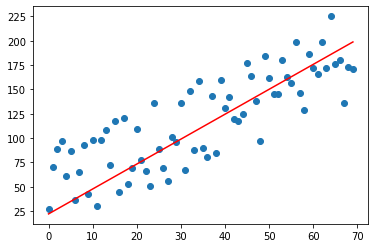

In [ ]:
# Making predictions
Y_pred = m*X + b

plt.scatter(X, Y)
plt.plot([X[0], X[-1]], [Y_pred[0], Y_pred[-1]], color='red')  # regression line
plt.show()

Note that you have to be careful about the learning-rate $\alpha$ parameter.
If you pick it to be too small, it will take forever to go to the minimum, but on the other hand, if you take it to be too big, then your loss function will start to diverge.
As we saw in numerical iterations before, if the number of iterations is too small, you may not get a good results, and if it's too big, it will take too long to get the answer you need.
Often, we simply must scan these parameters to figure out what appropriate values are for the problems we're using the neural networks on.

---
# Part 2:  Neural Networks

## 2.1: NN basics

An example of a single-layer neural network is
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" alt="nn" style="width: 300px;"/>

On the computer, it actually does the following
<img src='http://cs231n.github.io/assets/imagemap.jpg' alt="multiple dimensions" style="width: 500px;">

Neural networks are collections of neurons that are connected in a graph.
In other words, the outputs of some neurons become inputs to other neurons.
Instead of amorphous blobs of connected neurons, neural-network models are usually organized into distinct layers of neurons.
For regular neural networks, the most common layer type is the fully-connected layer in which neurons between two adjacent layers are fully pairwise connected, and neurons within a single layer share no connections.

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## 2.2: Building blocks

- **Loss Function**: We can measure the accuracy of our hypothesis function by using a cost function. This takes an average of all the results of the hypothesis with inputs from $x$'s compared to the actual output $y$'s. The goal is to minimize this loss/error.

- **Gradient Decent** and **Learning Rate**: So we have our hypothesis function (the neural net) and we have a way of measuring how well it fits the data. Now we need to estimate the parameters in hypothesis function (the weights in the neural net). The way we do this is by taking the derivative of the cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent, and the size of each step is determined by the parameter $\alpha$, which is called the learning rate.

- **Backpropagation**: We can apply the chain rule to a multilayer neural network (propagating the gradient backwards through the layers). An _$n$-layer neural network_ can simply be seen as $\tilde{y_i} = f_n\left(W_n\cdots f_2(W_2 f_1(W_1 X))\right)$, where $f_1, f_2, \ldots, f_n$ are the activation functions of each layer, $W_1, W_2, \ldots, W_n$ are the matrices of parameters of each layer, and $X$ is the input.

- **Optimizer**: The optimizer iterates whichever of the many varieties of gradient descent we may choose to employ.

- **Activation Function**: Some nonlinear function applied to intermediate layers' outputs before feeding into the next layer.

## 2.3  Convolutional neural networks (CNNs)

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio inputs.
They have three main types of layers:

- Convolutional layers
- Pooling layers
- Fully connected layers

A convolutional layer is the first layer of a CNN.
Convolutional layers can be followed by additional convolutional layers or pooling layers, then a fully-connected layer is the final layer.
With each layer, the CNN increases in its complexity, identifying greater portions of the image.
Earlier layers focus on simple features, such as colors and edges.
As the image data progresses through the layers of the CNN, it starts to recognize larger elements or shapes of the object until it finally identifies the intended object.
This improvement of the recognition capabilities of a neural network with increasing depth is what has led to the dominance of deep neural networks (DNNs), of which CNNs are one type.

### 2.3.1: Convolutional layers

The convolutional layer is the core building block of a CNN, and it is where the majority of computation occurs.
It requires a few components, which are input data, a filter, and a feature map.
Let's assume that the input will be a color image, which is made up of a matrix of pixels in 3D.
This means that the input will have three dimensions: horizontal, vertical, and RGB.
We also have a feature detector, also known as a kernel or a filter, which is applied at various points across the image.
This process is known as a convolution.

The kernel is a two-dimensional array of weights.
While they can vary in size, it is typically a $3\times 3$ matrix; this also determines the size of the receptive field.
The filter is then applied to an area of the image, and a dot product is calculated between the input pixels and the filter, which becomes an element of the output array.
Afterwards, the filter shifts by a stride, repeating the process until the kernel has swept across the entire image.
The final output from the series of dot products is known as a feature map, activation map, or a convolved feature.

![CNN](https://anhvnn.files.wordpress.com/2018/02/convolve.png?w=1000)



For a filter of size $N \times N$ applied to an image of size $W \times H$, with padding $P$ and stride $S$, the output tensor will have the dimensions

$$
\left(\frac{W - N + 2P}{S} + 1\right) \times \left(\frac{H - N + 2P}{S} + 1\right)
$$

Let's apply a basic convolution to a grayscale image.
We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the corresponding value in the filter, and then sum them up to produce the activation value in the resulting tensor.

In [ ]:
## If you cannot import the files, try running on Colab
import cv2
from scipy import misc

In [ ]:
img = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
def simple_convolution(img, filter):
    output = np.copy(img)
    size_x, size_y = img.shape
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            convolution = 0.0
            convolution = convolution + (img[x - 1, y-1] * filter[0][0])
            convolution = convolution + (img[x, y-1] * filter[0][1])
            convolution = convolution + (img[x + 1, y-1] * filter[0][2])
            convolution = convolution + (img[x-1, y] * filter[1][0])
            convolution = convolution + (img[x, y] * filter[1][1])
            convolution = convolution + (img[x+1, y] * filter[1][2])
            convolution = convolution + (img[x-1, y+1] * filter[2][0])
            convolution = convolution + (img[x, y+1] * filter[2][1])
            convolution = convolution + (img[x+1, y+1] * filter[2][2])
            if(convolution<0):
                convolution=0
            if(convolution>255):
                convolution=255
            output[x, y] = convolution
    return output

In [ ]:
#Experiment with different filters to see the effects.

filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]      #vertical edge detector  (bottom sobel )
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]      #horizontal edge detector (right sobel)

#filter = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]  #outline
#filter = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]      #sharpen
#filter = [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]       #emboss

In [ ]:
output = simple_convolution(img, filter)

plt.subplot(1,2,1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(output, 'gray')
plt.title('Output')

#### Task
Try out different filters as defined above, and write down your observations in the Markdown cell below.

#### Your obvervation below



### 2.3.2: Pooling layers
Pooling layers, also known as downsampling, reducing the size of the data.
Similar to a convolutional layer, the pooling operation sweeps a filter across the entire input, but the difference is that this filter does not have any weights.
Instead, the kernel applies an aggregation function to the values within the receptive field, populating the output array.
There are two main types of pooling:

- **Max pooling:** As the filter moves across the input, it selects the pixel with the maximum value to send to the output array. This approach is somewhat more popular than average pooling. See an example below:
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" alt="MaxPooling" style="width: 400px;"/>

- **Average pooling:** As the filter moves across the input, it calculates the average value within the receptive field to send to the output array.

While a lot of information is lost in a pooling layer, it has a number of benefits for the CNN.
Pooling layers help to reduce complexity, improve efficiency, and reduce the risk of overfitting.

### 2.3.3: Fully connected layers
The name of the full-connected (FC) layer aptly describes itself.
As mentioned earlier, the pixel values of the input image are not directly connected to the output layer in partially connected layers.
However, in the fully-connected layer, each node in the output layer connects directly to a node in the previous layer.

This layer performs the task of classification based on the features extracted through the previous layers and their different filters. While convolutional and pooling layers tend to use [ReLu functions](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)), FC layers usually leverage a softmax [activation function](https://en.wikipedia.org/wiki/Activation_function) to classify inputs appropriately, producing a probability from 0 to 1.

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)


We actually go and start building your networks in  the in-class notebook.

---
## Assignment Wrap-up



Please fill out the following Google Form when you complete this assignment

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe
	src="https://forms.gle/Y66wJvJptRiXwD4E9"
	width="80%"
	height="1200px"
	frameborder="0"
	marginheight="0"
	marginwidth="0">
	Loading...
</iframe>
"""
)